1. REQUIREMENTS

In [4]:
# !pip install pandas
# !pip install matplotlib
# !pip install statsmodels
# !pip install seaborn

2. IMPORT LIBRARIES

In [5]:
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX



3. ANALYSIS

c:\Users\manue\anaconda3\envs\Airdata\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\manue\anaconda3\envs\Airdata\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\manue\anaconda3\envs\Airdata\lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


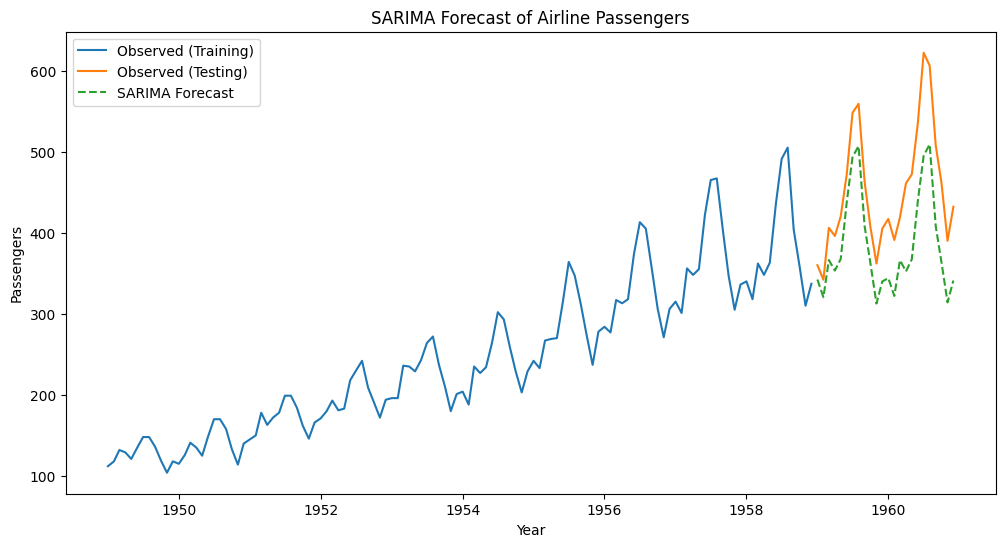

In [7]:

# Load the dataset
df = pd.read_csv('C:/Users/manue/OneDrive/Escritorio/ESTUDIO/PROGRAMACIÓN/PYTHON/airlinedata/data/airline-passengers.csv', parse_dates=['month'])
df.index.freq = 'MS'
df = df.set_index('month')

# Decompose the time series
decompose_result = seasonal_decompose(df['total_passengers'], model='multiplicative', period=12)
observed_data = decompose_result.observed.dropna()

# Train/Test split
train = observed_data[:'1958-12-31']
test = observed_data['1959-01-01':]

# Define SARIMA model
model = SARIMAX(train, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
fit_model = model.fit(disp=False)

# Forecast future values
forecast = fit_model.predict(start=len(train), end=len(train) + len(test) - 1, typ='levels')

# Plotting the results
plt.figure(figsize=(12, 6))
plt.plot(train.index, train, label='Observed (Training)')
plt.plot(test.index, test, label='Observed (Testing)')
plt.plot(test.index, forecast, label='SARIMA Forecast', linestyle='--')
plt.title('SARIMA Forecast of Airline Passengers')
plt.xlabel('Year')
plt.ylabel('Passengers')
plt.legend()
plt.show()